**simple linear regression / multiple linear regression / ridge regrression / lasso regression**

In [97]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# **Load the dataset**

In [98]:
x, y = datasets.load_diabetes(return_X_y=True, as_frame=True)
df = pd.DataFrame(x, y) 
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
target,,,,,,,,,,
1.5e+02,0.0018,-0.045,-0.0041,-0.0057,-0.0084,-0.024,0.052,-0.039,-0.0089,-0.014
75,-0.0091,0.051,-0.031,-0.026,-0.011,-0.001,-0.021,-0.0026,0.0062,0.028
1.4e+02,-0.027,-0.045,0.048,-0.047,0.034,0.057,-0.08,0.13,0.045,0.13
2.1e+02,0.0018,0.051,0.026,-0.0091,0.025,0.038,-0.021,0.034,0.0094,0.0031
1.4e+02,-0.0055,-0.045,0.056,-0.037,-0.048,-0.043,-0.073,0.038,0.051,0.057


# **Simple Linear Regression**

In [99]:
x_train, x_test, y_train, y_test = train_test_split(
                                      x['bmi'], y, test_size=100)
df = pd.DataFrame(np.column_stack([x_train, y_train]),
                    columns=['X', 'Y'])

df.head()


,X,Y
0,0.089,3.1e+02
1,-0.012,2e+02
2,0.014,1.9e+02
3,-0.03,88
4,0.039,2.2e+02


In [100]:
var_train = x_train.values.reshape(-1, 1)

linreg = LinearRegression(normalize=True)
linreg.fit(var_train,y_train)
y_train_pred = linreg.predict(var_train)
error_train = sum((y_train_pred - y_train)**2) / x_train.shape[0]
print('MSE of training data:', error_train)
print()

var_test = x_test.values.reshape(-1, 1)
y_test_pred = linreg.predict(var_test)
error_test = sum((y_test_pred - y_test)**2) / x_test.shape[0]
print('MSE of test data:', error_test)
print() 

simple_coef = linreg.coef_
print('coefficient:', simple_coef)


MSE of training data: 3789.3055878202304

MSE of test data: 4262.481473882609

coefficient: [904.54821649]


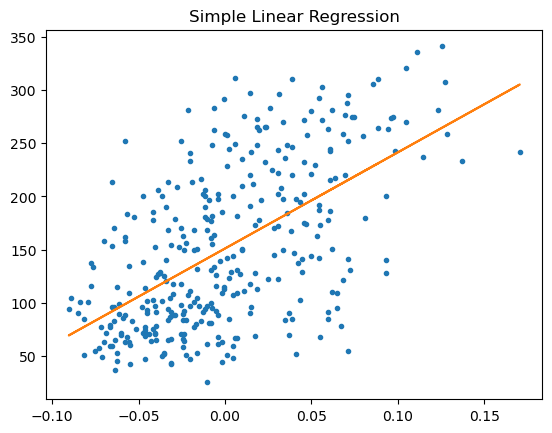

In [101]:
plt.title('Simple Linear Regression')
plt.plot(x_train, y_train, '.')
plt.plot(x_train, y_train_pred)

# **Multiple Regression with all features**

In [102]:
x_train, x_test, y_train, y_test = train_test_split(
                                      x, y, test_size=0.3)

var_train = x_train[x_train.columns[0:10]].values
var_test = x_test[x_test.columns[0:10]].values

col = ['error_train','error_test'] + ['coef_Var_%d'%i for i in range(1,11)]
ind = ['linear_coef']
coef_matrix_linear = pd.DataFrame(index=ind, columns=col)


In [103]:
def linear_reg(x_training, x_testing, y_training, y_testing):

   linreg = LinearRegression(normalize=True)
   linreg.fit(x_training, y_training)
   
   y_train_pred = linreg.predict(x_training)
   error_train = sum((y_train_pred - y_training)**2) / x_training.shape[0]
   result = [error_train]
   y_test_pred = linreg.predict(x_testing)
   error_test = sum((y_test_pred - y_testing)**2) / x_testing.shape[0]
   result.extend([error_test])
  
   coef_linear = linreg.coef_
   result.extend(coef_linear)
   return (result)


coef_matrix_linear.iloc[0] = linear_reg(var_train, var_test, y_train, y_test)
coef_matrix_linear

,error_train,error_test,coef_Var_1,coef_Var_2,coef_Var_3,coef_Var_4,coef_Var_5,coef_Var_6,coef_Var_7,coef_Var_8,coef_Var_9,coef_Var_10
linear_coef,3e+03,2.6e+03,28,-3.1e+02,6.1e+02,3.1e+02,-5.3e+02,1.9e+02,59,3.1e+02,5.7e+02,38


# **Ridge Regression with all features**

In [104]:
x_train, x_test, y_train, y_test = train_test_split(
                                      x, y, test_size=0.3)

alpha_ridge = [0, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20, 25]

col = ['error_train','error_test'] + ['coef_Var_%d'%i for i in range(1,11)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)


In [105]:
def ridge(x_training, x_testing, y_training, y_testing, alpha):
      
   ridge_reg = Ridge(alpha=alpha, normalize=True)
   ridge_reg.fit(x_training, y_training.values)
   y_train_pred = ridge_reg.predict(x_training)
   error_train = sum((y_train_pred - y_training)**2) / x_training.shape[0]
   result = [error_train]

   y_test_pred = ridge_reg.predict(x_testing)
   error_test = sum((y_test_pred - y_testing)**2) / x_testing.shape[0]
   result.extend([error_test])
   result.extend(ridge_reg.coef_)
   coef = ridge_reg.coef_

   return (result, coef)

for i in range(10):
   coef_matrix_ridge.iloc[i] = ridge(x_train, x_test, y_train, y_test, alpha_ridge[i])[0]
   
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,error_train,error_test,coef_Var_1,coef_Var_2,coef_Var_3,coef_Var_4,coef_Var_5,coef_Var_6,coef_Var_7,coef_Var_8,coef_Var_9,coef_Var_10
alpha_0,3e+03,2.5e+03,-0.73,-2.5e+02,5.5e+02,2.7e+02,-7e+02,4.3e+02,65,1.4e+02,7e+02,1.5e+02
alpha_1e-08,3e+03,2.5e+03,-0.73,-2.5e+02,5.5e+02,2.7e+02,-7e+02,4.3e+02,65,1.4e+02,7e+02,1.5e+02
alpha_0.0001,3e+03,2.6e+03,-0.69,-2.5e+02,5.5e+02,2.7e+02,-6.9e+02,4.3e+02,62,1.4e+02,7e+02,1.5e+02
alpha_0.001,3e+03,2.6e+03,-0.32,-2.5e+02,5.5e+02,2.7e+02,-6.4e+02,3.9e+02,39,1.4e+02,6.8e+02,1.5e+02
alpha_0.01,3e+03,2.6e+03,1.8,-2.5e+02,5.5e+02,2.7e+02,-3.7e+02,1.7e+02,-78,1e+02,5.7e+02,1.5e+02
alpha_1,3.4e+03,2.9e+03,30,-80,3.1e+02,1.9e+02,25,-17,-1.4e+02,1.1e+02,2.5e+02,1.5e+02
alpha_5,4.5e+03,3.8e+03,30,-6.5,1.3e+02,88,36,20,-69,72,1.1e+02,83
alpha_10,5e+03,4.3e+03,21,0.94,76,54,26,18,-43,48,68,52
alpha_20,5.5e+03,4.7e+03,13,2.2,42,31,16,12,-25,28,39,30
alpha_25,5.6e+03,4.8e+03,11,2.1,35,25,14,10,-21,24,32,25


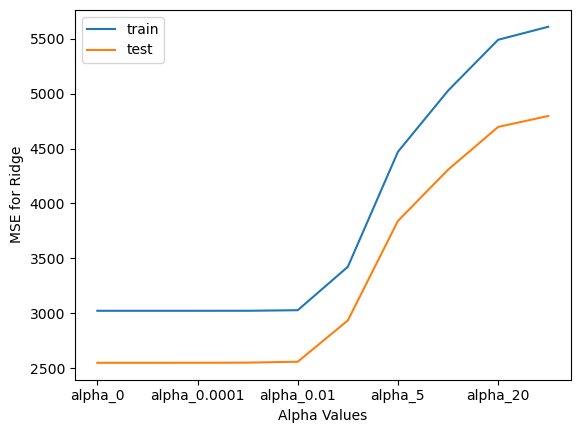

In [106]:
coef_matrix_ridge[['error_train','error_test']].plot()
plt.xlabel('Alpha Values')
plt.ylabel('MSE for Ridge')
plt.legend(['train', 'test'])

In [111]:
col = ['error_train','error_test'] + ['coef_Var_%d'%i for i in range(1,11)]
ind = ['alpha_%.2g'%1]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

coef_ridge = ridge(x_train, x_test, y_train, y_test, 1)[1]
coef_matrix_ridge.iloc[0] = ridge(x_train, x_test, y_train, y_test, 1)[0]
coef_matrix_ridge

,error_train,error_test,coef_Var_1,coef_Var_2,coef_Var_3,coef_Var_4,coef_Var_5,coef_Var_6,coef_Var_7,coef_Var_8,coef_Var_9,coef_Var_10
alpha_1,3.4e+03,2.9e+03,30,-80,3.1e+02,1.9e+02,25,-17,-1.4e+02,1.1e+02,2.5e+02,1.5e+02


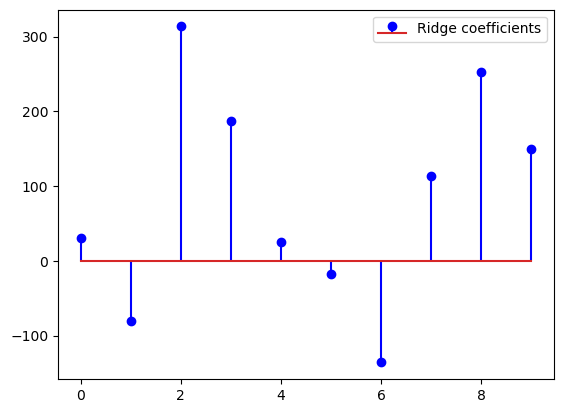

In [112]:
markerline, stemline, baseline = plt.stem(
    np.where(coef_ridge)[0],
    coef_ridge[coef_ridge != 0],
    markerfmt="o",
    label="Ridge coefficients",
)
plt.setp([markerline, stemline], color="blue")
plt.legend(loc='best')
plt.show()

# **Lasso Regression with all features**

In [118]:
x_train, x_test, y_train, y_test = train_test_split(
                                      x, y, test_size=0.3)

alpha_lasso = [0, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20, 25]

col = ['error_train','error_test'] + ['coef_Var_%d'%i for i in range(1,11)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

In [119]:
def lasso_reg(x_training, x_testing, y_training, y_testing, alpha):
    
    lasso = Lasso(alpha=alpha, normalize=True)
    lasso.fit(x_training, y_training)
    y_train_pred = lasso.predict(x_training)
    error_train = sum((y_train_pred - y_training)**2) / x_training.shape[0]
    ret = [error_train]

    y_test_pred = lasso.predict(x_testing)
    error_test = sum((y_test_pred - y_testing)**2) / x_testing.shape[0]
    ret.extend([error_test])
    
    ret.extend(lasso.coef_)
    coef_lasso = lasso.coef_

    return (ret, coef_lasso)



for i in range(10):
  coef_matrix_lasso.iloc[i] = lasso_reg(x_train, x_test,
                                         y_train, y_test, alpha_lasso[i])[0]
    
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_lasso

,error_train,error_test,coef_Var_1,coef_Var_2,coef_Var_3,coef_Var_4,coef_Var_5,coef_Var_6,coef_Var_7,coef_Var_8,coef_Var_9,coef_Var_10
alpha_0,2.7e+03,3.2e+03,12,-2.6e+02,5.1e+02,3.2e+02,-5.6e+02,3.4e+02,-79,59,6.7e+02,66
alpha_1e-08,2.7e+03,3.2e+03,12,-2.6e+02,5.1e+02,3.2e+02,-5.6e+02,3.4e+02,-79,59,6.7e+02,66
alpha_0.0001,2.7e+03,3.2e+03,12,-2.6e+02,5.1e+02,3.2e+02,-5.6e+02,3.4e+02,-81,59,6.7e+02,66
alpha_0.001,2.7e+03,3.2e+03,12,-2.6e+02,5.1e+02,3.2e+02,-5.1e+02,3e+02,-1e+02,54,6.5e+02,66
alpha_0.01,2.7e+03,3.2e+03,7.1,-2.6e+02,5.2e+02,3.2e+02,-1.2e+02,0,-2.7e+02,4.8,5.2e+02,63
alpha_1,3.5e+03,3.9e+03,0,-0,4.1e+02,27,0,0,-0,0,3.6e+02,0
alpha_5,5.9e+03,6.1e+03,0,0,0,0,0,0,-0,0,0,0
alpha_10,5.9e+03,6.1e+03,0,0,0,0,0,0,-0,0,0,0
alpha_20,5.9e+03,6.1e+03,0,0,0,0,0,0,-0,0,0,0
alpha_25,5.9e+03,6.1e+03,0,0,0,0,0,0,-0,0,0,0


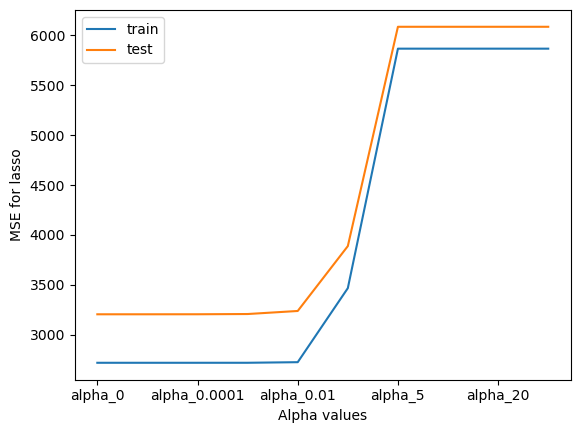

In [120]:
coef_matrix_lasso[['error_train', 'error_test']].plot()
plt.xlabel('Alpha values')
plt.ylabel('MSE for lasso')
plt.legend(['train', 'test'])

In [121]:
col = ['error_train','error_test'] + ['coef_Var_%d'%i for i in range(1,11)]
ind = ['alpha_%.2g'%0.01]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

coef_lasso = lasso_reg(x_train, x_test, y_train, y_test, 0.01)[1]
coef_matrix_lasso.iloc[0] = lasso_reg(x_train, x_test, y_train, y_test, 0.01)[0]
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_lasso

,error_train,error_test,coef_Var_1,coef_Var_2,coef_Var_3,coef_Var_4,coef_Var_5,coef_Var_6,coef_Var_7,coef_Var_8,coef_Var_9,coef_Var_10
alpha_0.01,2.7e+03,3.2e+03,7.1,-2.6e+02,5.2e+02,3.2e+02,-1.2e+02,0,-2.7e+02,4.8,5.2e+02,63


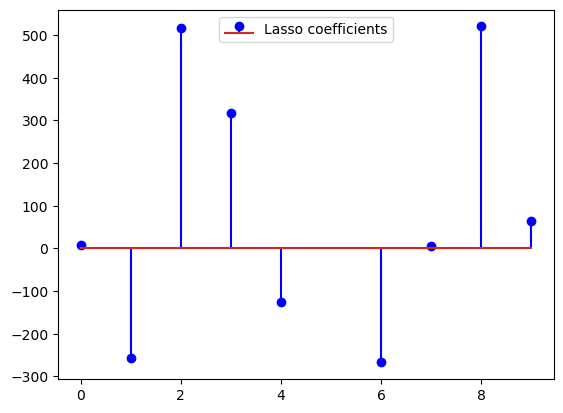

In [122]:
markerline, stemline, baseline = plt.stem(
    np.where(coef_lasso)[0],
    coef_lasso[coef_lasso != 0],
    markerfmt="o",
    label="Lasso coefficients",
)
plt.setp([markerline, stemline], color="blue")
plt.legend(loc='best')
plt.show()